# IRDM: Assignment 4

### Assignment (part 1, Unsupervised, 25%):
1. Explore the dataset. Do the descriptive statistics.
2. Explanatory data analysis. Exploring the features, visualizations etc. (https://
www.kaggle.com/learn/data-visualization, https://towardsdatascience.com/ exploratory-data-analysis-8fc1cb20fd15, https://www.mastersindatascience.org/ learning/what-is-exploratory-data-analysis/ )
3. Feature engineering. Encodings, generating the features from date-time, sum and from other columns. (https://www.kaggle.com/learn/feature-engineering, https:// www.kaggle.com/learn/data-cleaning )
4. Unsupervised learning. Do the Cluster analysis. Segment the customers. K-means, Hierarchical Clustering. With different metrics, linkages. Visualize the clusters etc. Look for the optimal number of the clusters
5. Analyzing the results.
6. Conclusion.

**Dataset Description:**
- types.csv - reference of transaction types
- codes.csv - reference of transaction codes
- transactions.csv - transactional data on banking operations
- train_set.csv - training set with client gender marking (0/1 - client gender) 
- test_set.csv - no need to use.

**Transactions.csv columns description:**
- client_id - client is id
- datetime -transaction date (format - ordered day number hh:mm:ss - 421 06:33:15) - code - transaction code
- type - transaction type
- sum - sum of transaction

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import math

## 1. Explore the dataset. Do the descriptive statistics.

In [7]:
transactions = pd.read_csv('transactions.csv', sep=';')
transactions.head()

,client_id,datetime,code,type,sum
0,96372458,421 06:33:15,6011,2010,-561478.94
1,24567813,377 17:20:40,6011,7010,67377.47
2,21717441,55 13:38:47,6011,2010,-44918.32
3,14331004,263 12:57:08,6011,2010,-3368873.66
4,85302434,151 10:34:12,4814,1030,-3368.87


In [8]:
transactions.tail()

,client_id,datetime,code,type,sum
130034,15836839,147 11:50:53,5411,1010,-26344.59
130035,28369355,305 11:59:34,4829,2330,-24705.07
130036,40949707,398 21:13:58,5411,1110,-40353.72
130037,7174462,409 13:58:14,5411,1010,-25536.06
130038,92197764,319 00:00:00,5533,1110,-12127.95


In [9]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130039 entries, 0 to 130038
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   client_id  130039 non-null  int64  
 1   datetime   130039 non-null  object 
 2   code       130039 non-null  int64  
 3   type       130039 non-null  int64  
 4   sum        130039 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 5.0+ MB


In [10]:
transactions.size

650195

In [11]:
transactions.describe()

,client_id,code,type,sum
count,1.300390e+05,130039.000000,130039.000000,1.300390e+05
mean,5.086859e+07,5594.629996,2489.372135,-1.812909e+04
std,2.872854e+07,606.087084,2253.296578,5.584445e+05
min,2.289900e+04,742.000000,1000.000000,-4.150030e+07
25%,2.577174e+07,5211.000000,1030.000000,-2.244916e+04
50%,5.235837e+07,5641.000000,1110.000000,-5.502490e+03
75%,7.506302e+07,6010.000000,2370.000000,-1.122960e+03
max,9.999968e+07,9402.000000,8145.000000,6.737747e+07


In [12]:
transactions.columns

Index(['client_id', 'datetime', 'code', 'type', 'sum'], dtype='object')

In [13]:
transactions.dtypes

client_id      int64
datetime      object
code           int64
type           int64
sum          float64
dtype: object

In [14]:
transactions.shape

(130039, 5)

In [15]:
transactions.nunique()

client_id      8656
datetime     114770
code            175
type             67
sum           27450
dtype: int64

In [16]:
codes = pd.read_csv('codes.csv', sep=";")
codes.head()

,code,code_description
0,5944,"Магазины по продаже часов, ювелирных изделий и..."
1,5621,Готовые сумочные изделия
2,5697,"Услуги по переделке, починке и пошиву одежды"
3,7995,Транзакции по азартным играм
4,5137,"Мужская, женская и детская спец-одежда"


In [17]:
codes.tail()

,code,code_description
179,5044,"Офисное, фотографическое, фотокопировальное, и..."
180,5983,"Горючее топливо — уголь, нефть, разжиженный бе..."
181,5994,Дилеры по продаже печатной продукции
182,5192,"Книги, периодические издания и газеты"
183,7922,Театральные продюсерские агентства


In [18]:
codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   code              184 non-null    int64 
 1   code_description  184 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [19]:
codes.size

368

In [20]:
codes.describe()

,code
count,184.000000
mean,6046.793478
std,1470.328104
min,742.000000
25%,5208.250000
50%,5813.500000
75%,7283.000000
max,9402.000000


In [21]:
codes.columns

Index(['code', 'code_description'], dtype='object')

In [22]:
codes.dtypes

code                 int64
code_description    object
dtype: object

In [23]:
codes.shape

(184, 2)

In [24]:
codes.nunique()

code                184
code_description    184
dtype: int64

In [25]:
types = pd.read_csv('types.csv', sep=';')
types.head()

,type,type_description
0,8001,Установление расх. лимита по карте
1,2411,Перевод с карты на счет др.лица в одном тер. б...
2,4035,н/д(нет данных)
3,3001,Комиссия за обслуживание ссудного счета
4,2420,Перевод с карты на счет физ.лица в другом тер....


In [26]:
types.tail()

,type,type_description
150,4110,Плата за получение наличных в АТМ.
151,2320,Безналичный перевод денежных средств через POS
152,7040,Перевод на карту (с карты) через POS (в предел...
153,2433,Перевод с карты на счет физ.лица в другом банк...
154,2431,Перевод с карты на счет физ.лица в другом банк...


In [27]:
types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   type              155 non-null    int64 
 1   type_description  155 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.5+ KB


In [28]:
types.describe()

,type
count,155.000000
mean,10819.045161
std,80000.258847
min,1000.000000
25%,2385.500000
50%,4040.000000
75%,7027.500000
max,999999.000000


In [29]:
types.size

310

In [30]:
types.columns

Index(['type', 'type_description'], dtype='object')

In [31]:
types.shape

(155, 2)

In [32]:
types.dtypes

type                 int64
type_description    object
dtype: object

In [33]:
train = pd.read_csv('train_set.csv', sep=';')
train.head()

,client_id,target
0,75063019,0
1,86227647,1
2,6506523,0
3,50615998,0
4,95213230,0


In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   client_id  6000 non-null   int64
 1   target     6000 non-null   int64
dtypes: int64(2)
memory usage: 93.9 KB


In [35]:
print("Number of clients:", transactions.client_id.nunique())

Number of clients: 8656


In [36]:
print("Number of completed transactions:",transactions.code.nunique())

Number of completed transactions: 175


In [37]:
# Collecting all datasets 
combining = transactions.merge(train, how='left', on='client_id').copy()
combining_ = combining.merge(types, how='left', on='type').copy()
transaction = combining_.merge(codes, how='left', on='code').copy() 
transaction.head()

,client_id,datetime,code,type,sum,target,type_description,code_description
0,96372458,421 06:33:15,6011,2010,-561478.94,0.0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
1,24567813,377 17:20:40,6011,7010,67377.47,NaN,Взнос наличных через АТМ (в своем тер.банке),Финансовые институты — снятие наличности автом...
2,21717441,55 13:38:47,6011,2010,-44918.32,0.0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
3,14331004,263 12:57:08,6011,2010,-3368873.66,NaN,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
4,85302434,151 10:34:12,4814,1030,-3368.87,0.0,Оплата услуги. Банкоматы,"Звонки с использованием телефонов, считывающих..."


In [14]:
transaction.shape

(130039, 8)

There are data about 130.039 transactions.

In [148]:
print("The number of 'н/д' rows:", len(transaction[transaction.type_description == 'н/д']))
transaction.drop(transaction[transaction.type_description == 'н/д'].index, inplace=True)

The number of 'н/д' rows: 122


In [149]:
transaction.target = transaction.sort_values(by='client_id').target.fillna(method='ffill')
transaction.head()

,client_id,datetime,code,type,sum,target,type_description,code_description
0,96372458,421 06:33:15,6011,2010,-561478.94,0.0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
1,24567813,377 17:20:40,6011,7010,67377.47,1.0,Взнос наличных через АТМ (в своем тер.банке),Финансовые институты — снятие наличности автом...
2,21717441,55 13:38:47,6011,2010,-44918.32,0.0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
3,14331004,263 12:57:08,6011,2010,-3368873.66,0.0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
4,85302434,151 10:34:12,4814,1030,-3368.87,0.0,Оплата услуги. Банкоматы,"Звонки с использованием телефонов, считывающих..."


In [150]:
days_time = [i for i in transaction.datetime.str.split(' ')]
days = [days_time[i][0] for i in range(len(days_time))]
days = [int(i) for i in days]

In [151]:
ywd = pd.date_range(end = '2021-01-01', periods = max(days)+1).tolist()
ywd

[Timestamp('2019-10-03 00:00:00', freq='D'),
 Timestamp('2019-10-04 00:00:00', freq='D'),
 Timestamp('2019-10-05 00:00:00', freq='D'),
 Timestamp('2019-10-06 00:00:00', freq='D'),
 Timestamp('2019-10-07 00:00:00', freq='D'),
 Timestamp('2019-10-08 00:00:00', freq='D'),
 Timestamp('2019-10-09 00:00:00', freq='D'),
 Timestamp('2019-10-10 00:00:00', freq='D'),
 Timestamp('2019-10-11 00:00:00', freq='D'),
 Timestamp('2019-10-12 00:00:00', freq='D'),
 Timestamp('2019-10-13 00:00:00', freq='D'),
 Timestamp('2019-10-14 00:00:00', freq='D'),
 Timestamp('2019-10-15 00:00:00', freq='D'),
 Timestamp('2019-10-16 00:00:00', freq='D'),
 Timestamp('2019-10-17 00:00:00', freq='D'),
 Timestamp('2019-10-18 00:00:00', freq='D'),
 Timestamp('2019-10-19 00:00:00', freq='D'),
 Timestamp('2019-10-20 00:00:00', freq='D'),
 Timestamp('2019-10-21 00:00:00', freq='D'),
 Timestamp('2019-10-22 00:00:00', freq='D'),
 Timestamp('2019-10-23 00:00:00', freq='D'),
 Timestamp('2019-10-24 00:00:00', freq='D'),
 Timestamp

In [152]:
transaction['date'] = [ywd[j] for i in range(len(days)) for j in range(max(days)+1) if days[i] == j]

In [153]:
transaction.head()

,client_id,datetime,code,type,sum,target,type_description,code_description,date
0,96372458,421 06:33:15,6011,2010,-561478.94,0.0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,2020-11-27
1,24567813,377 17:20:40,6011,7010,67377.47,1.0,Взнос наличных через АТМ (в своем тер.банке),Финансовые институты — снятие наличности автом...,2020-10-14
2,21717441,55 13:38:47,6011,2010,-44918.32,0.0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,2019-11-27
3,14331004,263 12:57:08,6011,2010,-3368873.66,0.0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,2020-06-22
4,85302434,151 10:34:12,4814,1030,-3368.87,0.0,Оплата услуги. Банкоматы,"Звонки с использованием телефонов, считывающих...",2020-03-02


We have divided the column 'Sum' to income & spendings, because it's more logical and comfortable to work with transactions in such way. Income is positive values, when client funded a bank account, Spending is negative values, when withdraw money from a bank account.

In [22]:
transaction['income'] = transaction['sum'].where(transaction['sum'] > 0) 
transaction['spending'] = transaction['sum'].where(transaction['sum'] <= 0)
transaction = transaction.replace(np.nan, 0)

### Descriptive statistics has two types: 

- Measures of central tendency (mean, median, mode, quartiles)
- Measures of dispersion (standard deviation, variance, range)

In [23]:
# Huge number of 0 values in our data because one person makes different transactions
income = transaction[transaction.income > 0].income
spending = transaction[transaction.spending < 0].spending

In [154]:
print('Average spendings of clients: ', round(np.mean(spending), 2))
print('Average income of clients: ', round(np.mean(income), 2))
print('-' * 40)
print('Median of spending: ', round(np.median(spending), 2))
print('Median of income: ', round(np.median(income), 2))
print('-' * 40)
print('Mode of spendings: ', spending.mode())
print('Mode of income: ', income.mode())
print('-' * 40)
print('Standard deviation of spendings of clients: ', round(np.std(spending), 2))
print('Standard deviation of income of clients: ', round(np.std(income), 2))

Average spendings of clients:  -61913.13
Average income of clients:  172174.28
----------------------------------------
Median of spending:  -8983.66
Median of income:  22459.16
----------------------------------------
Mode of spendings:  0   -2245.92
dtype: float64
Mode of income:  0    22459.16
dtype: float64
----------------------------------------
Standard deviation of spendings of clients:  323390.12
Standard deviation of income of clients:  1081321.27


**Using quartiles we can identify and count the number of outliers.**

In [155]:
Q1 = income.quantile(0.25)
Q3 = spending.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers=[]
for x in income:
    if ((x>upper) or (x<lower)):
         outliers.append(x)
print('There are', len(outliers), 'outlier incomes.')

There are 24311 outlier incomes.


## 2. Exploratory data analysis. Exploring the features, visualizations

Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics often with visual methods. As we have already explored the datasets, let's visualize them.

### Visualization №1

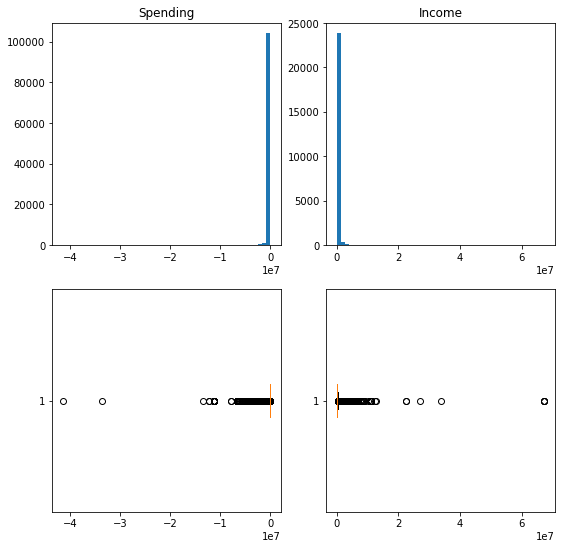

In [162]:
fig, ax = plt.subplots(nrows=2, ncols = 2, figsize=(9,9))

ax[0,0].set_title('Spending')
ax[0,1].set_title('Income')

ax[0,0].hist(spending, 50);
ax[1,0].boxplot(spending, vert=False);

ax[0,1].hist(income, 50);
ax[1,1].boxplot(income, vert=False);

Given histograms and boxplots illustrates the outliers of income and spendings. There we can see that for income we have positive values, starting from 0, and for spending is vice versa.

### Visualization №2

In [163]:
vis2 = transaction.groupby('code_description').code.count().sort_values(ascending = False).reset_index().head()
vis2.head()

,code_description,code
0,Финансовые институты — снятие наличности автом...,27917
1,Финансовые институты — снятие наличности вручную,18684
2,"Звонки с использованием телефонов, считывающих...",18641
3,"Бакалейные магазины, супермаркеты",18467
4,Денежные переводы,11355


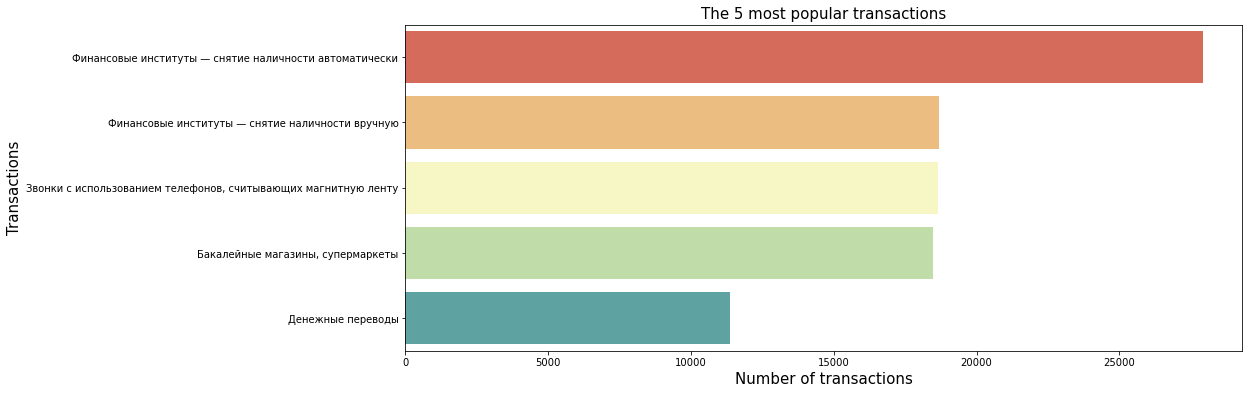

In [167]:
fig, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "code", y = "code_description", linewidth=1, palette = "Spectral", data=df_v2)
plt.xlabel('Number of transactions', size = 15)
plt.ylabel('Transactions', size = 15)
plt.title('The 5 most popular transactions',  size = 15)
plt.show()

The barchart represents five most popular transactions ever made. We grouped by code descriptions and summarized them. "Финансовые институты — снятие наличности автоматически" holds the first place with around 28000 transactions. It can be concluded that most people prefer automatic transactions in banks.

### Visualization №3

In [30]:
df_v3 = transaction.groupby('code_description').code.count().sort_values(ascending = False).reset_index().tail()
df_v3

,code_description,code
170,Нефть и нефтепродукты,1
171,Почтовые услуги — только правительство,1
172,Агенты и менеджеры по аренде недвижимости,1
173,Разнообразные издательства/печатное дело,1
174,"Генеральные подрядчики по вентиляции, теплосна...",1


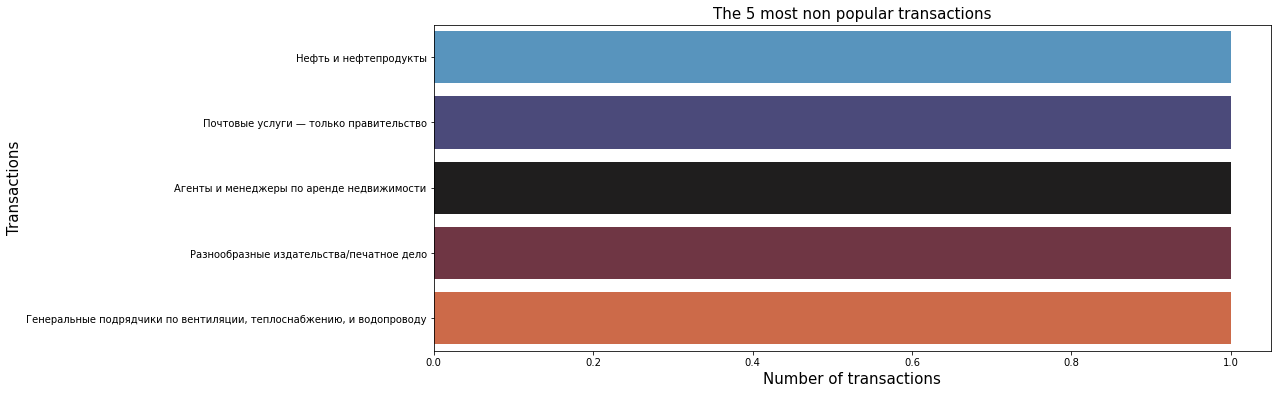

In [171]:
fig, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "code", y = "code_description", linewidth=1, palette = 'icefire', data=df_v3)
plt.xlabel('Number of transactions', size = 15)
plt.ylabel('Transactions', size = 15)
plt.title('The 5 most non popular transactions',  size = 15)
plt.show()

**Comment:** Here we represented the 5 most unpopular types of transactions. There are more than 5 transactions which were made only once. Some of the examples are 'Нефть и нефтепродукты', 'Почтовые услуги - только правительство'.

### Visualization №4

In [172]:
popular_transaction = transaction[transaction.code_description=="Финансовые институты — снятие наличности автоматически"] 
popular_transaction.head()

,client_id,datetime,code,type,sum,target,type_description,code_description,date
0,96372458,421 06:33:15,6011,2010,-561478.94,0.0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,2020-11-27
1,24567813,377 17:20:40,6011,7010,67377.47,1.0,Взнос наличных через АТМ (в своем тер.банке),Финансовые институты — снятие наличности автом...,2020-10-14
2,21717441,55 13:38:47,6011,2010,-44918.32,0.0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,2019-11-27
3,14331004,263 12:57:08,6011,2010,-3368873.66,0.0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,2020-06-22
15,2444292,355 09:47:45,6011,2010,-65131.56,0.0,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,2020-09-22


In [174]:
#Extract years from date by saving them into a new column 
popular_transaction['year'] = pd.DatetimeIndex(popular_transaction['date']).year
popular_transaction['year']

<ipython-input-174-e82ba9bb069a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popular_transaction['year'] = pd.DatetimeIndex(popular_transaction['date']).year


0         2020
1         2020
2         2019
3         2020
15        2020
          ... 
130012    2020
130016    2020
130027    2020
130028    2020
130032    2020
Name: year, Length: 27917, dtype: int64

In [175]:
vis3 = popular_transaction.groupby("year")["code"].sum().reset_index()
vis3 = popular_transaction.rename(columns = {"sum":"code"})
vis3 = vis3.sort_values(by = "year", ascending = True)

In [176]:
num_of_year = vis3.groupby(['year'])['client_id'].count()
num_of_year

year
2019     5224
2020    22645
2021       48
Name: client_id, dtype: int64

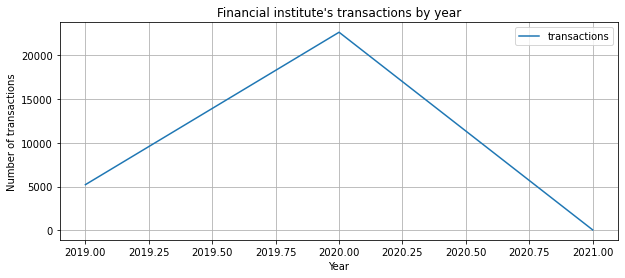

In [36]:
#Visualization of linear plot
plt.figure(figsize=(10,4))
plt.plot(num_of_year.index, num_of_year.values)
plt.grid()
plt.xlabel('Year')
plt.ylabel('Number of transactions')
plt.title("Financial institute's transactions by year")
plt.legend(["transactions"])
plt.show()

The linear plot shows the amount of Financial institute's transactions by year. The number of transactions keep rises from 5000 to 20000+ and then suddenly falls down at the start of 2020's year. If we look at the amount of transactions by each year, we may discover that almost all of the transactions are made in 2020.

## 3. Feature engineering. Encodings, generating the features from date-time, sum and from other columns. 

### RFM Analysis

Recency, frequency, monetary value (RFM) is a marketing analysis tool used to identify a firm's best clients based on the nature of their spending habits.

In [235]:
rfm = transaction.groupby(by='client_id', as_index=False).date.max()
rfm['Frequency'] =  transaction.groupby(by='client_id').date.count().values
rfm = rfm.merge(transaction[transaction['sum']<0].groupby(by='client_id')['sum'].min(), how='left', on='client_id').rename(columns={'sum':'max_spending'})
rfm = rfm.merge(transaction[transaction['sum']<0].groupby(by='client_id')['sum'].max(), how='left', on='client_id').rename(columns={'sum':'min_spending'})
rfm = rfm.merge(transaction[transaction['sum']>0].groupby(by='client_id')['sum'].min(), how='left', on='client_id').rename(columns={'sum':'min_income'})
rfm = rfm.merge(transaction[transaction['sum']>0].groupby(by='client_id')['sum'].max(), how='left', on='client_id').rename(columns={'sum':'max_income'})
rfm = rfm.merge(transaction[transaction['sum']<0].groupby(by='client_id')['sum'].sum(), how='left', on='client_id').rename(columns={'sum':'spending'})
rfm = rfm.merge(transaction[transaction['sum']>0].groupby(by='client_id')['sum'].sum(), how='left', on='client_id').rename(columns={'sum':'income'})
rfm.head()

,client_id,date,Frequency,max_spending,min_spending,min_income,max_income,spending,income
0,22899,2020-12-17,9,-8759.07,-1122.96,17967.33,44918.32,-34497.27,85344.81
1,27914,2020-07-21,4,-2245.92,-2245.92,11229.58,67377.47,-4491.84,78607.05
2,28753,2020-12-09,13,-1392467.78,-3368.87,673774.73,673774.73,-3263575.02,673774.73
3,31385,2020-08-12,13,-56147.89,-291.97,4491.83,33688.74,-121705.95,38180.57
4,38084,2020-12-05,26,-224591.58,-44.92,22459.16,988202.94,-1058318.65,1751814.31


In [236]:
rfm.fillna(0, inplace=True)
rfm.head()

,client_id,date,Frequency,max_spending,min_spending,min_income,max_income,spending,income
0,22899,2020-12-17,9,-8759.07,-1122.96,17967.33,44918.32,-34497.27,85344.81
1,27914,2020-07-21,4,-2245.92,-2245.92,11229.58,67377.47,-4491.84,78607.05
2,28753,2020-12-09,13,-1392467.78,-3368.87,673774.73,673774.73,-3263575.02,673774.73
3,31385,2020-08-12,13,-56147.89,-291.97,4491.83,33688.74,-121705.95,38180.57
4,38084,2020-12-05,26,-224591.58,-44.92,22459.16,988202.94,-1058318.65,1751814.31


In [237]:
transaction[transaction['sum']<0].groupby(by='client_id')['sum'].min()

client_id
22899         -8759.07
27914         -2245.92
28753      -1392467.78
31385        -56147.89
38084       -224591.58
               ...    
99967537    -336887.37
99984336    -179673.26
99985917    -224591.58
99991245     -67377.47
99999680    -449183.15
Name: sum, Length: 8577, dtype: float64

In [238]:
transaction[transaction['sum']<0].groupby(by='client_id')['sum'].max()

client_id
22899        -1122.96
27914        -2245.92
28753        -3368.87
31385         -291.97
38084          -44.92
              ...    
99967537   -336887.37
99984336   -179673.26
99985917   -224591.58
99991245    -16574.86
99999680     -1527.22
Name: sum, Length: 8577, dtype: float64

In [239]:
transaction_period = pd.date_range(start=transaction.date.min(),end = transaction.date.max(), periods = 4).tolist()
transaction_period

[Timestamp('2019-10-03 00:00:00'),
 Timestamp('2020-03-03 00:00:00'),
 Timestamp('2020-08-02 00:00:00'),
 Timestamp('2021-01-01 00:00:00')]

In [240]:
rfm['recent_range'] = pd.cut(rfm.date.values, 
                     transaction_period, 
                     right=False, 
                     labels=['old', 
                             'moderate', 
                             'recent'])

In [241]:
rfm.groupby(by='recent_range').date.count()

recent_range
old          205
moderate     601
recent      7566
Name: date, dtype: int64

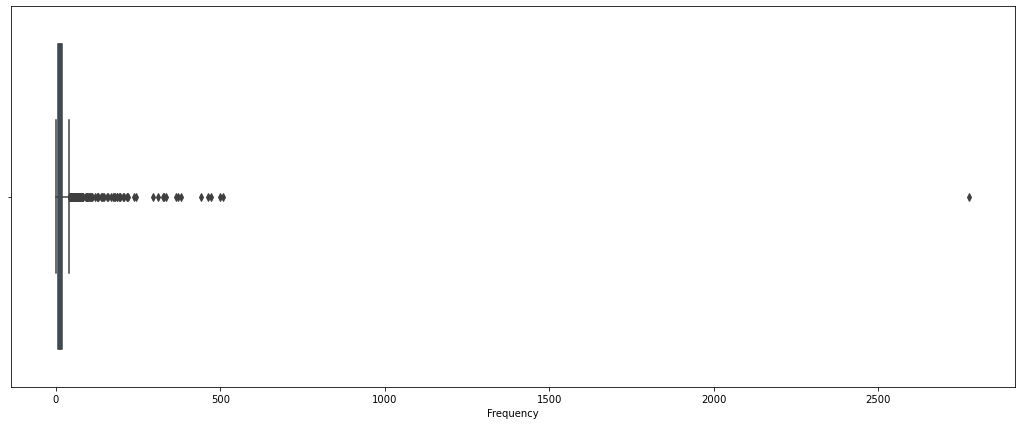

In [242]:
plt.figure(figsize=(18,7))
sns.boxplot(data=rfm, x=rfm.Frequency);

In [243]:
Q1 = np.percentile(rfm.Frequency, 25)
Q3 = np.percentile(rfm.Frequency, 75)
IQR = Q3-Q1

upper = Q3 + 1.5*IQR
upper

40.0

In [244]:
rounding_to_nearest_int = math.ceil(upper/3)
conditions = [
    (rfm.Frequency < rounding_to_nearest_int),
    (rfm.Frequency >= rounding_to_nearest_int) & (rfm.Frequency < 2*rounding_to_nearest_int),
    (rfm.Frequency >= 2*r) & (rfm.Frequency <= upper) | (rfm.Frequency > upper)
    ]

values = ['seldom', 
          'not often',
          'very often']

rfm['frequency_range'] = np.select(conditions, values)

In [245]:
rfm.head()

,client_id,date,Frequency,max_spending,min_spending,min_income,max_income,spending,income,recent_range,frequency_range
0,22899,2020-12-17,9,-8759.07,-1122.96,17967.33,44918.32,-34497.27,85344.81,recent,seldom
1,27914,2020-07-21,4,-2245.92,-2245.92,11229.58,67377.47,-4491.84,78607.05,moderate,seldom
2,28753,2020-12-09,13,-1392467.78,-3368.87,673774.73,673774.73,-3263575.02,673774.73,recent,seldom
3,31385,2020-08-12,13,-56147.89,-291.97,4491.83,33688.74,-121705.95,38180.57,recent,seldom
4,38084,2020-12-05,26,-224591.58,-44.92,22459.16,988202.94,-1058318.65,1751814.31,recent,not often


In [246]:
rfm.groupby(by='frequency_range').Frequency.count()

frequency_range
not often     2440
seldom        5241
very often     975
Name: Frequency, dtype: int64

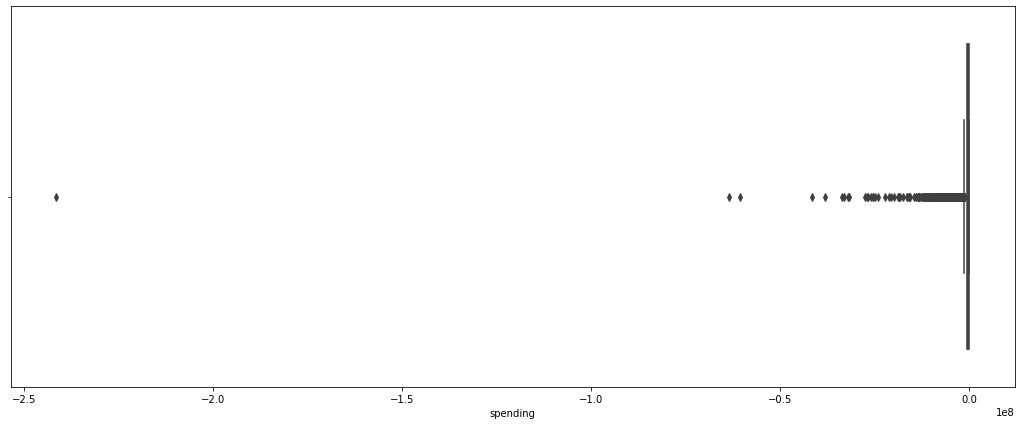

In [247]:
plt.figure(figsize=(18,7))
sns.boxplot(data=rfm, x=rfm.spending);

In [248]:
Q1 = np.percentile(rfm.spending, 25)
Q3 = np.percentile(rfm.spending, 75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
lower

-1442779.2262499998

In [249]:
rounding_to_nearest_int = math.ceil(lower/3)
conditions = [
    (rfm.spending > r),
    (rfm.spending <= rounding_to_nearest_int) & (rfm.spending > 2*rounding_to_nearest_int),
    (rfm.spending <= 2*rounding_to_nearest_int) & (rfm.spending >= lower) | (rfm.spending < lower)
    ]

values = ['-small', 
          '-avg',
          '-large']

rfm['minus_amount'] = np.select(conditions, values)

In [250]:
rfm.head()

,client_id,date,Frequency,max_spending,min_spending,min_income,max_income,spending,income,recent_range,frequency_range,minus_amount
0,22899,2020-12-17,9,-8759.07,-1122.96,17967.33,44918.32,-34497.27,85344.81,recent,seldom,0
1,27914,2020-07-21,4,-2245.92,-2245.92,11229.58,67377.47,-4491.84,78607.05,moderate,seldom,0
2,28753,2020-12-09,13,-1392467.78,-3368.87,673774.73,673774.73,-3263575.02,673774.73,recent,seldom,-large
3,31385,2020-08-12,13,-56147.89,-291.97,4491.83,33688.74,-121705.95,38180.57,recent,seldom,0
4,38084,2020-12-05,26,-224591.58,-44.92,22459.16,988202.94,-1058318.65,1751814.31,recent,not often,-large


In [251]:
rfm.minus_amount.value_counts()

0         5904
-large    1420
-avg      1332
Name: minus_amount, dtype: int64

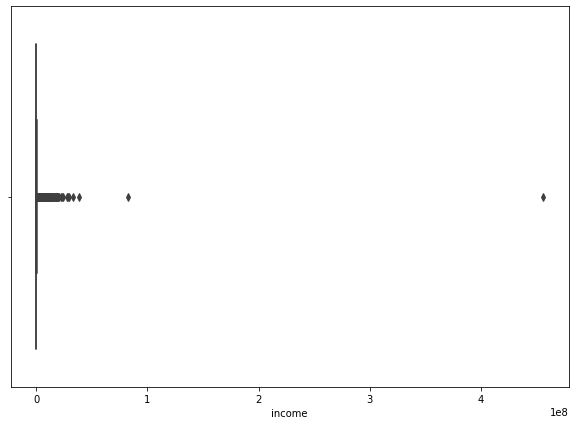

In [252]:
plt.figure(figsize=(10,7))
sns.boxplot(data=rfm, x=rfm.income);

In [253]:
Q1 = np.percentile(rfm.income, 25)
Q3 = np.percentile(rfm.income, 75)
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR
upper

564988.2125

In [254]:
rounding_to_nearest_int = math.ceil(upper/3)
conditions = [
    (rfm.income < rounding_to_nearest_int),
    (rfm.income >= rounding_to_nearest_int) & (rfm.income < 2*rounding_to_nearest_int),
    (rfm.income >= 2*rounding_to_nearest_int) & (rfm.income <= upper) | (rfm.income > upper)
    ]

values = ['+small', 
          '+avg',
          '+large']

rfm['plus_amount'] = np.select(conditions, values)

In [255]:
rfm.head()

,client_id,date,Frequency,max_spending,min_spending,min_income,max_income,spending,income,recent_range,frequency_range,minus_amount,plus_amount
0,22899,2020-12-17,9,-8759.07,-1122.96,17967.33,44918.32,-34497.27,85344.81,recent,seldom,0,+small
1,27914,2020-07-21,4,-2245.92,-2245.92,11229.58,67377.47,-4491.84,78607.05,moderate,seldom,0,+small
2,28753,2020-12-09,13,-1392467.78,-3368.87,673774.73,673774.73,-3263575.02,673774.73,recent,seldom,-large,+large
3,31385,2020-08-12,13,-56147.89,-291.97,4491.83,33688.74,-121705.95,38180.57,recent,seldom,0,+small
4,38084,2020-12-05,26,-224591.58,-44.92,22459.16,988202.94,-1058318.65,1751814.31,recent,not often,-large,+large


In [256]:
rfm.plus_amount.value_counts()

+small    6243
+large    1638
+avg       775
Name: plus_amount, dtype: int64

In [257]:
re = {'old':1, 
      'moderately':2, 
      'recent':3}

fr = {'seldom':1, 
      'often':2,
      'very often':3}

mi = {'-small':3, 
      '-avg':2,
      '-large':1}

pl = {'+small':1, 
      '+avg':2,
      '+large':3}

rfm['re_range'] = rfm.recent_range.map(re)
rfm['fre_range'] = rfm.frequency_range.map(fr)
rfm['min_amount'] = rfm.minus_amount.map(mi)
rfm['pl_amount'] = rfm.plus_amount.map(pl)
rfm.head()

,client_id,date,Frequency,max_spending,min_spending,min_income,max_income,spending,income,recent_range,frequency_range,minus_amount,plus_amount,re_range,fre_range,min_amount,pl_amount
0,22899,2020-12-17,9,-8759.07,-1122.96,17967.33,44918.32,-34497.27,85344.81,recent,seldom,0,+small,3.0,1.0,NaN,1
1,27914,2020-07-21,4,-2245.92,-2245.92,11229.58,67377.47,-4491.84,78607.05,moderate,seldom,0,+small,NaN,1.0,NaN,1
2,28753,2020-12-09,13,-1392467.78,-3368.87,673774.73,673774.73,-3263575.02,673774.73,recent,seldom,-large,+large,3.0,1.0,1.0,3
3,31385,2020-08-12,13,-56147.89,-291.97,4491.83,33688.74,-121705.95,38180.57,recent,seldom,0,+small,3.0,1.0,NaN,1
4,38084,2020-12-05,26,-224591.58,-44.92,22459.16,988202.94,-1058318.65,1751814.31,recent,not often,-large,+large,3.0,NaN,1.0,3


In [258]:
# the worst clients (1111)
rfm[(rfm.re_range == 1) & (rfm.fre_range==1) & (rfm.min_amount==1) & (rfm.pl_amount==1)]

,client_id,date,Frequency,max_spending,min_spending,min_income,max_income,spending,income,recent_range,frequency_range,minus_amount,plus_amount,re_range,fre_range,min_amount,pl_amount
158,1798485,2019-11-15,7,-3368873.66,-5614.79,0.0,0.0,-3635531.24,0.0,old,seldom,-large,+small,1.0,1.0,1.0,1
2896,34179937,2020-01-29,2,-1684436.83,-26411.97,0.0,0.0,-1710848.80,0.0,old,seldom,-large,+small,1.0,1.0,1.0,1
6955,80698386,2019-11-03,2,-761365.45,-224591.58,0.0,0.0,-985957.03,0.0,old,seldom,-large,+small,1.0,1.0,1.0,1
7596,88062408,2020-01-17,1,-1122957.89,-1122957.89,0.0,0.0,-1122957.89,0.0,old,seldom,-large,+small,1.0,1.0,1.0,1


In [259]:
# the best clients (3333)
rfm[(rfm.re_range == 3) & (rfm.fre_range==3) & (rfm.min_amount==3) & (rfm.pl_amount==3)]

,client_id,date,Frequency,max_spending,min_spending,min_income,max_income,spending,income,recent_range,frequency_range,minus_amount,plus_amount,re_range,fre_range,min_amount,pl_amount


### 4. Unsupervised learning. Do the Cluster analysis. Segment the customers. K-means, Hierarchical Clustering. With different metrics, linkages. Visualize the clusters etc. Look for the optimal number of the clusters

### Find the similarity of two sentences using the cosine distance

In [63]:
pip install pymystem3

Note: you may need to restart the kernel to use updated packages.


In [64]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

from pymystem3 import Mystem

import string
from string import punctuation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Amir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [65]:
# Create lemmatizer and stopwords list
mystem = Mystem() 
russian_stopwords = stopwords.words("russian")

In [66]:
# Preprocess function
def preprocess_text(text):
    tokens = mystem.lemmatize(text.lower())
    tokens = [token for token in tokens if token not in russian_stopwords\
              and token != " " \
              and token.strip() not in punctuation]
    
    text = " ".join(tokens)
    
    return text

In [271]:
_near = []
for i in transaction.code_description.unique():
    _near.append(preprocess_text(i))
    
vectorizer = CountVectorizer().fit_transform(_near)
vectors = vectorizer.toarray()
vector_size = len(vectors)
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [272]:
def cosine_sim_vectors(vec1, vec2):
    vec1 = vec1.reshape(1,-1)
    vec2 = vec2.reshape(1,-1)
    return cosine_similarity(vec1, vec2)[0][0]

In [273]:
def near_word(j, vector_size):
    array_v = []
    array_z = []
    for i in range(vector_size):
        result = cosine_sim_vectors(vectors[j], vectors[i])
        
        if(result<0.99 and result>0.1):
            array_v.append(i)
            array_z.append(result)
    answer = []
    answer.append({'idx': max_index(array_v, array_z), 'value':max(array_z)})
    return answer

In [274]:
def max_index(a, b):
    maximum = max(b)
    maximum_index = -1
    for i in range(len(b)):
        if(maximum == b[i]):
            maximum_index = i
    return a[maximum_index]

In [275]:
# Similar to the first sentence is the fourth
print(near_word(0, vector_size))
print(_near[0])
print(_near[3])

[{'idx': 3, 'value': 0.7999999999999999}]
финансовый институт  —  снятие наличность автоматически
финансовый институт  —  снятие наличность вручную


In [277]:
print(near_word(1, vector_size))
print(_near[1])
print(_near[79])

[{'idx': 79, 'value': 0.18257418583505539}]
звонок использование телефон считывать магнитный лента
телекоммуникационный оборудование включая продажа телефон


### Classification

In [73]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

import matplotlib.pyplot as plt

In [74]:
near = transaction.code_description

In [75]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])        
X = pipeline.fit_transform(near).todense()

pca = PCA(n_components=2).fit(X) # N dimension to 2D
data2D = pca.transform(X)
print(X.shape)
print(data2D.shape)

(129917, 477)
(129917, 2)


In [76]:
df = pd.DataFrame()

# 0 - Финансы
# 1 - Телефон
# 2 - Магазин
# 3 - Другое

df['_class'] = ['0' if 'инанс' in i else '1' if 'агазин' in i else '2' if 'телефон' in i else '3' for i in near]

In [77]:
df['X'] = data2D[:,0]
df['Y'] = data2D[:,1]

df.head(10)

,_class,X,Y
0,0,0.664476,-0.004580
1,0,0.664476,-0.004580
2,0,0.664476,-0.004580
3,0,0.664476,-0.004580
4,2,-0.473938,0.746770
5,1,-0.513737,-0.662951
6,0,0.586362,-0.003545
7,2,-0.473938,0.746770
8,2,-0.473938,0.746770
9,1,-0.221441,-0.050276


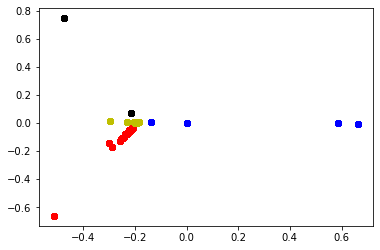

In [78]:
df0 = df[df._class == '0']
df1 = df[df._class == '1']
df2 = df[df._class == '2']
df3 = df[df._class == '3']

plt.scatter(df0['X'], df0['Y'], c = 'b')
plt.scatter(df1['X'], df1['Y'], c = 'r')
plt.scatter(df2['X'], df2['Y'], c = 'black')
plt.scatter(df3['X'], df3['Y'], c = 'y')
plt.show() 

In [79]:
# and Also with unqiue code_description
X = pipeline.fit_transform(_near).todense()
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
print(X.shape)
print(data2D.shape)

(175, 415)
(175, 2)


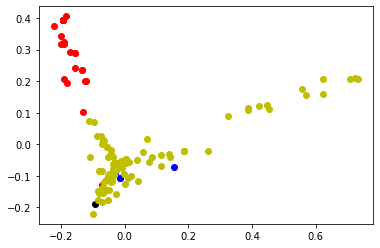

In [80]:
df = pd.DataFrame()
df['_class'] = ['0' if 'инанс' in i else '1' if 'агазин' in i else '2' if 'телефон' in i else '3' for i in _near]

df['X'] = data2D[:,0]
df['Y'] = data2D[:,1]

df0 = df[df._class == '0']
df1 = df[df._class == '1']
df2 = df[df._class == '2']
df3 = df[df._class == '3']

plt.scatter(df0['X'], df0['Y'], c = 'b')
plt.scatter(df1['X'], df1['Y'], c = 'r')
plt.scatter(df2['X'], df2['Y'], c = 'black')
plt.scatter(df3['X'], df3['Y'], c = 'y')
plt.show() 

### Hierarchical Clustering with different linkages

In [81]:
rfm.dropna(inplace=True)

In [82]:
data = rfm.iloc[:,-4:].sample(n = 10, random_state=2022)
data.index = [rfm[rfm.index==i].client_id.values[0] for i in data.index]

In [83]:
data

,re_range,fre_range,min_amount,pl_amount
84422977,3,1,2,1
370258,3,3,1,3
42235367,3,1,3,1
87450603,3,2,2,2
87451106,3,3,1,3
91582559,3,3,1,1
62408586,3,2,3,3
45338523,3,2,3,1
35759014,3,2,3,1
58163794,3,2,1,1


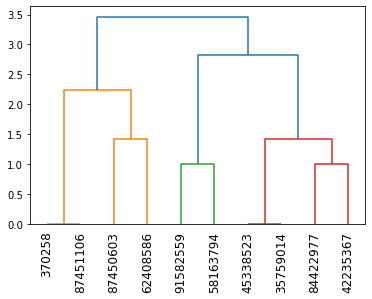

In [84]:
import scipy.cluster.hierarchy as model
dend_max = model.dendrogram(model.linkage(data.iloc[:,:4], method='complete'), labels=data.index, leaf_rotation=90)

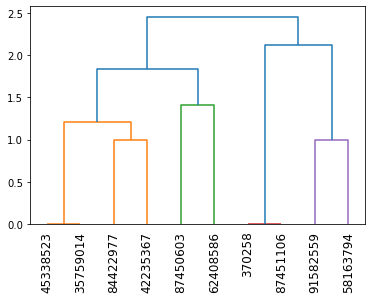

In [85]:
import scipy.cluster.hierarchy as model
dend_max = model.dendrogram(model.linkage(data.iloc[:,:4], method='average'), labels=data.index, leaf_rotation=90)

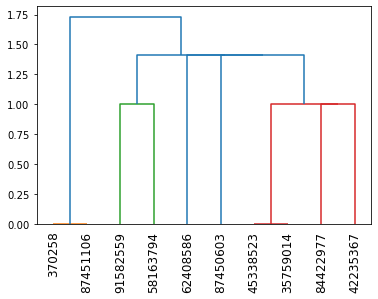

In [86]:
import scipy.cluster.hierarchy as model
dend_max = model.dendrogram(model.linkage(data.iloc[:,:4], method='single'), labels=data.index, leaf_rotation=90)

## 5. Analyzing the results

Here we have 3 types of client which are separated to best and worst. RFM is a great helper to build model to identify gender of clients. It can easily be reached by different types of transactions they make. Women are more prone to shopping in the store of things, perfumery and so on. Unfortunately, there are some noises in the model and we can not reach higher accuracy.

## 6. Conclusion

There are several methods for analyzins data about transactions made by clients. Explarotatory Data Analysis is a great tool for visualizing transactions by their frequency. RFM helps to identify best and worst customers. The beauty of RFM analysis is that it requires only the basic features, which is present in a transactional dataset most of the time. Classification is used for filtering the data based on categorical types changes.